# Sanity Checking the Subspace Network Digital Twin

This notebook performs a simulation run with the default parameter set
for a single run. It is meant to provide quick diagnostics on the model
capabilities.



## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from cadCAD_tools import easy_run

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [2]:
from subspace_model.params import INITIAL_STATE
from subspace_model.params import SINGLE_RUN_PARAMS
from subspace_model.params import TIMESTEPS
from subspace_model.params import SAMPLES
from subspace_model.structure import SUBSPACE_MODEL_BLOCKS

default_run_args = (INITIAL_STATE,
                     {k: [v] for k, v in SINGLE_RUN_PARAMS.items()},
                    SUBSPACE_MODEL_BLOCKS,
                    TIMESTEPS,
                    SAMPLES)
sim_df = easy_run(*default_run_args)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 37, 1, 29)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 37, 1, 29)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: single_threaded


Flattening results:   0%|          | 0/8413 [00:00<?, ?it/s]

Total execution time: 0.46s


In [3]:
sim_df.head(5)

,days_passed,delta_days,circulating_supply,user_supply,issued_supply,sum_of_stocks,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,...,avg_compute_weights_per_tx,std_compute_weights_per_tx,min_compute_weights_per_tx,avg_transaction_size,std_transaction_size,min_transaction_size,avg_transaction_count,avg_slash_per_day,avg_new_sectors_per_day,std_new_sectors_per_day
0,0,0,NaN,NaN,NaN,NaN,0.0,1.320000e+09,1.680000e+09,0.000000e+00,...,1000,1000,10,1000,5000,100,30,1,700,200
12,1,1,2.640000e+07,2.640000e+07,26400000.0,3.000000e+09,0.0,1.293600e+09,1.680000e+09,0.000000e+00,...,1000,1000,10,1000,5000,100,30,1,700,200
24,2,1,5.221575e+07,5.227200e+07,52272000.0,3.000000e+09,0.0,1.267728e+09,1.680000e+09,5.393985e+05,...,1000,1000,10,1000,5000,100,30,1,700,200
36,3,1,7.686673e+07,7.762656e+07,77626560.0,3.000000e+09,0.0,1.242373e+09,1.680000e+09,1.840538e+06,...,1000,1000,10,1000,5000,100,30,1,700,200
48,4,1,9.951457e+07,1.024596e+08,102474028.8,3.000000e+09,0.0,1.217526e+09,1.680000e+09,3.393119e+06,...,1000,1000,10,1000,5000,100,30,1,700,200


## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

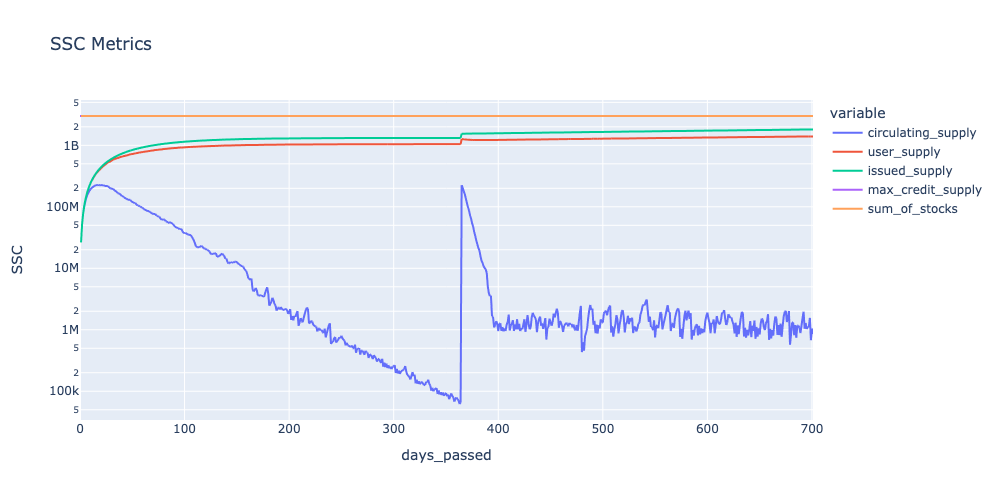

In [4]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "supply" in el] + ['sum_of_stocks'],
        title='SSC Metrics',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

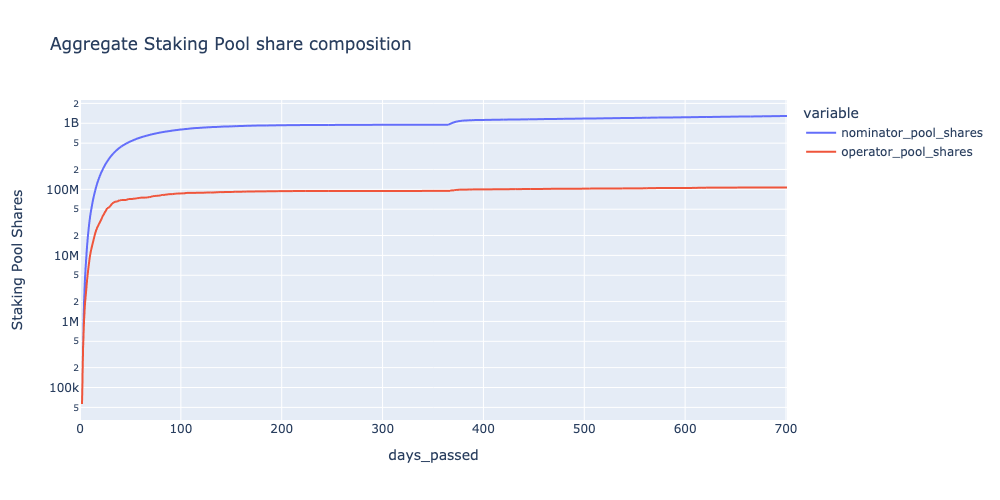

In [5]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "shares" in el],
        log_y=True,
        labels={'value': 'Staking Pool Shares'},
        title='Aggregate Staking Pool share composition'
        )
fig.update_layout(width=1000, height=500)
fig.show()

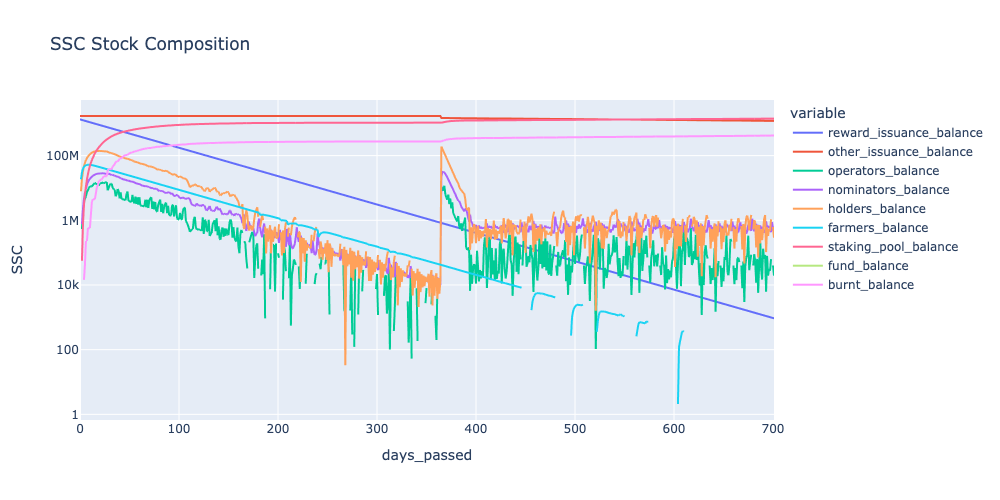

In [6]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "_balance" in el],
        title='SSC Stock Composition',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

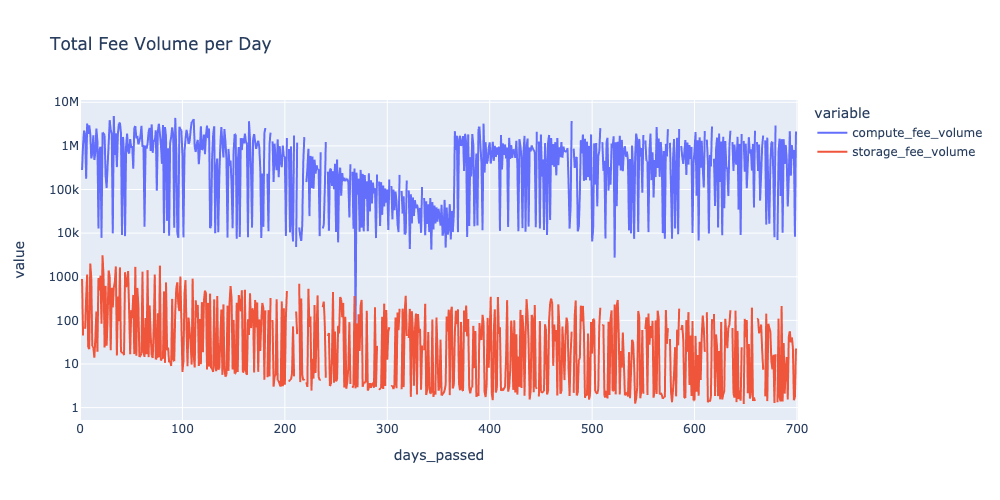

In [7]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "volume" in el],
        title='Total Fee Volume per Day',
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

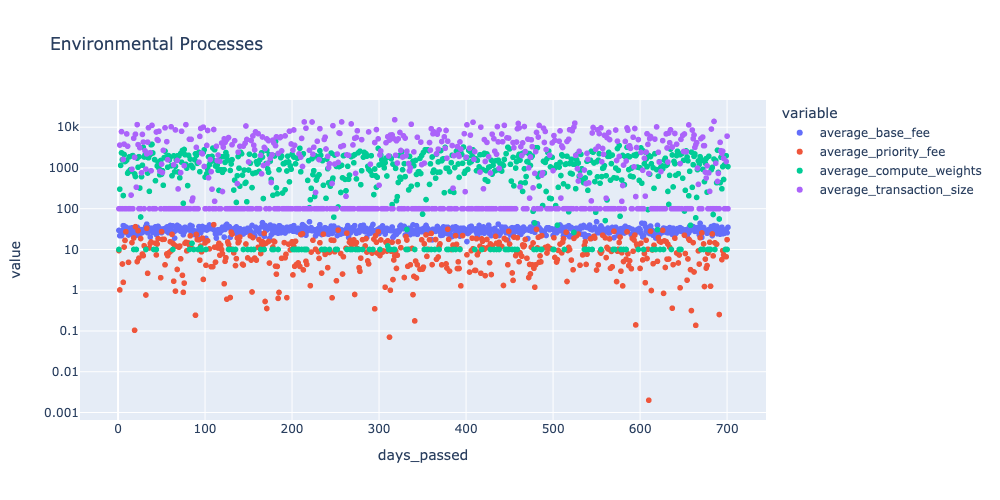

In [8]:
fig_df = sim_df.melt(id_vars=['days_passed'], value_vars=[el for el in sim_df.columns if "average" in el])


fig = px.scatter(fig_df, 
        x='days_passed', 
        y='value',
        color='variable',
        title='Environmental Processes',
        log_y=True)

fig.update_layout(width=1000, height=500)
fig.show()

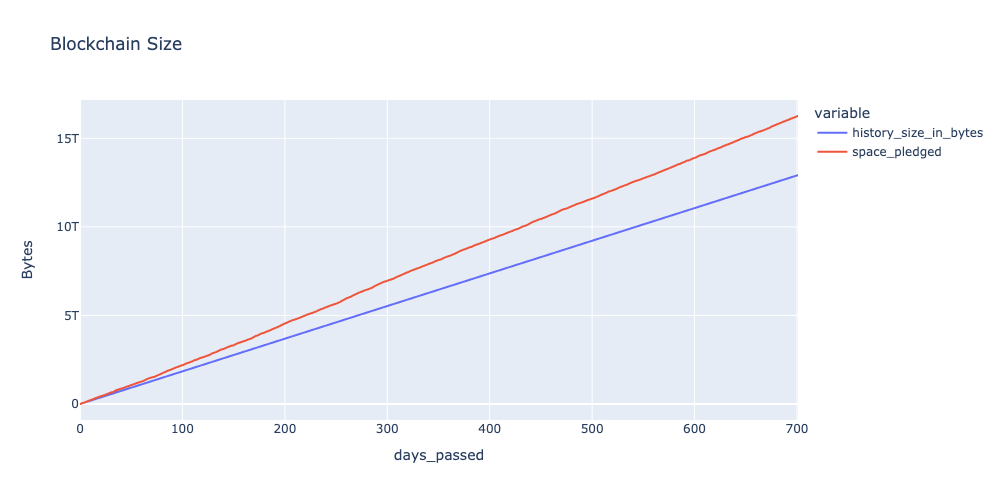

In [9]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['history_size_in_bytes', 'space_pledged'],
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.show()